## Part B: Naive Bayes on 20 Newsgroups

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


### Load 20 Newsgroups Data (Pick 4 categories)

In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all') 
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
categories = ['sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

X_raw = newsgroups.data
y = newsgroups.target
target_names = newsgroups.target_names

### Preprocessing: TF-IDF + Stopword Removal

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X_raw)

### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Train Multinomial Naive Bayes

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Evaluate the Model

Accuracy: 0.8960
Precision: 0.8972
Recall: 0.8960
                       precision    recall  f1-score   support

        comp.graphics       0.88      0.90      0.89       195
   rec.sport.baseball       0.87      0.95      0.91       199
            sci.space       0.91      0.81      0.86       197
talk.politics.mideast       0.93      0.91      0.92       188

             accuracy                           0.90       779
            macro avg       0.90      0.90      0.90       779
         weighted avg       0.90      0.90      0.90       779



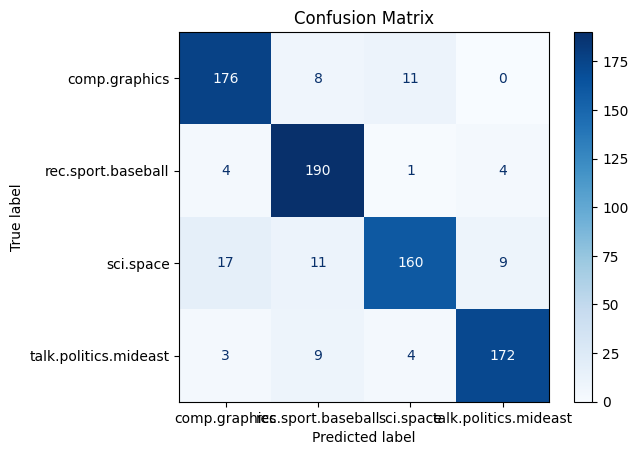

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Top Words Per Class

In [8]:
# Display the top 10 words for each class
feature_names = np.array(vectorizer.get_feature_names_out())
for i, class_label in enumerate(target_names[:4]):  # Adjust target_names as needed
    # Get the top 10 words for the current class
    top10 = np.argsort(model.feature_log_prob_[i])[-10:]
    print(f"Top 10 words for class '{class_label}':")
    print(feature_names[top10][::-1])  # Reverse to show highest first
    print()

Top 10 words for class 'comp.graphics':
['graphics' 'thanks' 'image' 'file' 'know' 'files' 'does' 'program'
 'format' 'looking']

Top 10 words for class 'rec.sport.baseball':
['game' 'year' 'team' 'baseball' 'games' 'think' 'don' 'hit' 'players'
 'just']

Top 10 words for class 'sci.space':
['space' 'nasa' 'like' 'orbit' 'shuttle' 'just' 'don' 'earth' 'moon'
 'think']

Top 10 words for class 'talk.politics.mideast':
['israel' 'jews' 'people' 'israeli' 'armenian' 'arab' 'armenians' 'jewish'
 'turkish' 'just']



### PCA

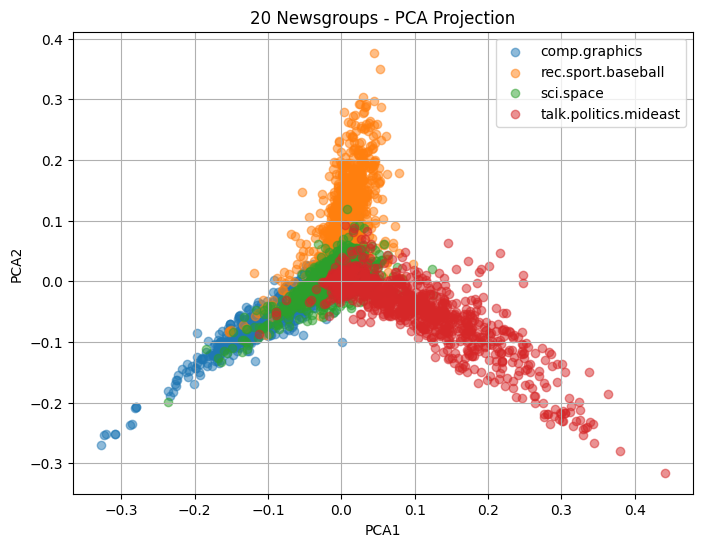

In [9]:


# Reduce dimensionality to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.5)
plt.legend()
plt.title("20 Newsgroups - PCA Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


### Summary: strengths and limitations of Naive Bayes and K-Nearest Neighbors (KNN) based on their characteristics

### Why Naive Bayes is Good for Text Classification:
1. **Feature Independence Assumption Works Well**:
   - In text classification, words are often treated as independent, which aligns with Naive Bayes' assumption.
  
2. **High-Dimensional Data Handling**:
   - Text data often has a very large feature space (e.g., thousands of unique words in a vocabulary), and Naive Bayes handles this efficiently.

3. **Sparse Data**:
   - Text data is typically sparse (most words are absent in a given document), and Naive Bayes is well-suited for such data.
   - Example: A document may only contain a small subset of the total vocabulary, but Naive Bayes can still classify it effectively.

4. **Fast and Efficient**:
   - Naive Bayes is computationally efficient, making it ideal for large-scale text datasets.
   - Example: It can quickly classify millions of emails as spam or not spam.

---

### Why Naive Bayes is Not Good for the Iris Dataset:
1. **Feature Independence Assumption is Violated**:
   - In the Iris dataset, features like petal length and petal width are highly correlated, which violates Naive Bayes' independence assumption.
   - Example: The relationship between petal length and width is important for distinguishing between species, but Naive Bayes ignores this dependency.

2. **Continuous Features**:
   - The Iris dataset contains continuous numerical features, and Naive Bayes requires assumptions (e.g., Gaussian distribution) to handle them.
   - Example: If the actual distribution of features is not Gaussian, the model's performance may degrade.

3. **Better Alternatives Exist**:
   - For datasets like Iris, where the relationships between features are important, models like K-Nearest Neighbors (KNN).
   - Example: KNN can capture the complex decision boundaries in the Iris dataset, while Naive Bayes oversimplifies the problem.

---

### Summary:
- **Text Classification**: Works well because features (words) are mostly independent, and the data is sparse and high-dimensional.
- **Iris Dataset for Classification**: Performs poorly because features are correlated, continuous, and require capturing complex relationships, which Naive Bayes cannot do effectively.